In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\cyril\AppData\Local\Temp\ipykernel_7484\383278000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2E77-A41D

 Directory of c:\Users\cyril\Documents\MSc Physics and Astronomy\Thesis\GitHub\Free_energy_of_simplicial_complexes\Cyril

12/03/2024  08:46    <DIR>          .
12/03/2024  14:50    <DIR>          ..
12/03/2024  08:46    <DIR>          .ipynb_checkpoints
08/03/2024  10:48         2.726.043 100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
08/03/2024  10:48             6.326 Create PR data.ipynb
08/03/2024  18:51             5.060 Creating Corr Matrixes.ipynb
08/03/2024  13:05            74.625 Cyril_real_vs_random.ipynb
08/03/2024  10:48         5.635.498 PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
12/03/2024  08:46    <DIR>          PR_CorreMatrixes
12/03/2024  08:46    <DIR>          PR_HCP
08/03/2024  10:48           337.984 prunned_matrix.txt100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcel

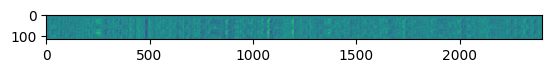

In [11]:
real=pd.read_csv('100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)
plt.imshow(real)

(116, 116)


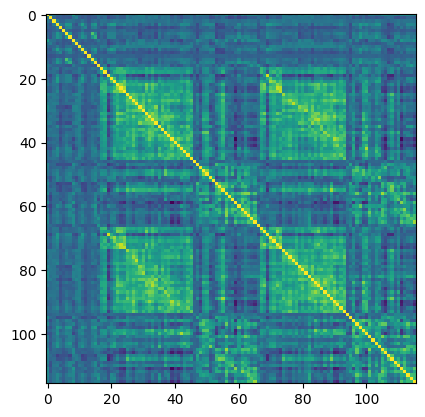

In [9]:
real_corr=real.T.corr().to_numpy()
print(np.shape(real_corr))
plt.imshow(real_corr)

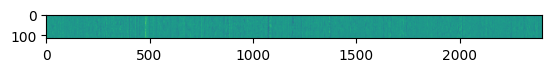

In [32]:
random=pd.read_csv('PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None, index_col=0)
#random=pd.read_csv('PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)
plt.imshow(random)

(115, 115)


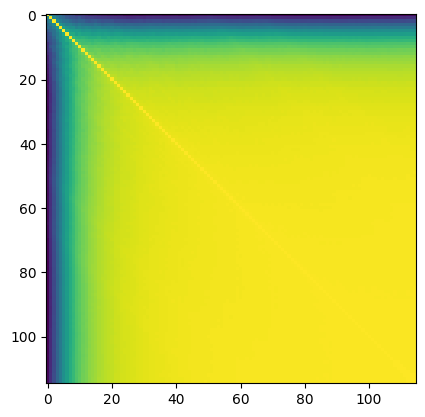

In [28]:
random_corr=random.T.corr().to_numpy()
print(np.shape(random_corr))
plt.imshow(random_corr)

13456
13225


ValueError: number of labels (2) does not match number of bars (26).

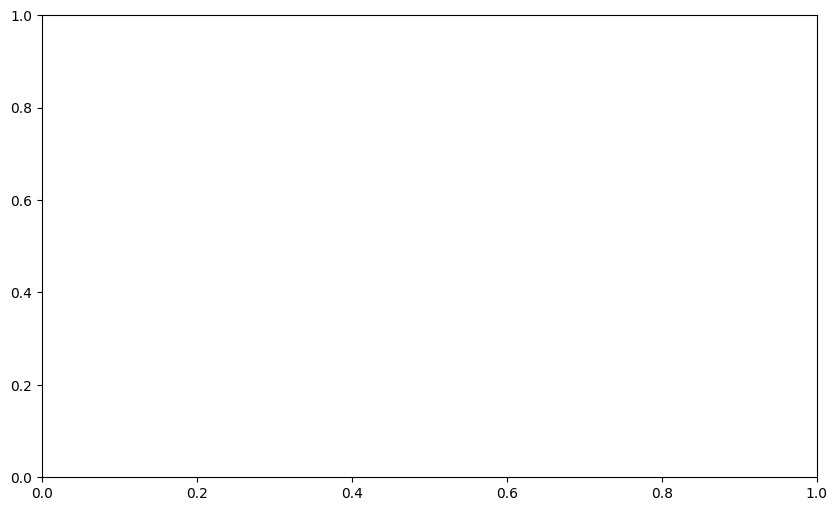

In [31]:
# Assuming real_corr and random_corr are your matrices
# Flatten the matrices
real_corr_flat = real_corr.flatten()
random_corr_flat = random_corr.flatten()

print(len(real_corr_flat))
print(len(random_corr_flat))

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot each with labels
sns.histplot([real_corr_flat,random_corr_flat], color=['blue','red'], label=['Real Matrix','Random Matrix'])
#sns.histplot(random_corr_flat, color='blue', label='Random Matrix')
#sns.histplot(real_corr_flat, color='red', label='Real Matrix')

# Add legend to the plot to show the labels
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [21]:
import numpy as np

# Example matrices
random_matrix = random_corr  # Random matrix
real_matrix = real_corr  # Real matrix, replace with your actual real matrix

# Compute the 2.5th and 97.5th percentiles of the random matrix
q025 = np.quantile(random_matrix, 0.025)
q975 = np.quantile(random_matrix, 0.975)

# Create a mask for elements in the real matrix that are NOT between q025 and q975
mask = (real_matrix < q025) | (real_matrix > q975)

# Apply mask to the real matrix
# Option 1: Set elements within the quantiles to 0 (or choose another value)
pruned_matrix = np.where(mask, real_matrix, 0)

# Option 2: If you want to completely remove these elements, it's a bit more complex
# as it would change the shape of the matrix. Typically, you'd work with the masked array
# or adapt your data structure for analyses that ignore these values.

# Show some of the pruned matrix values
print(pruned_matrix)  # Adjust as needed for your inspection


[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.07413469 ... 0.06210749 0.05147955 0.01105839]
 [0.         0.07413469 1.         ... 0.14015591 0.1416177  0.13303256]
 ...
 [0.         0.06210749 0.14015591 ... 1.         0.         0.        ]
 [0.         0.05147955 0.1416177  ... 0.         1.         0.        ]
 [0.         0.01105839 0.13303256 ... 0.         0.         1.        ]]


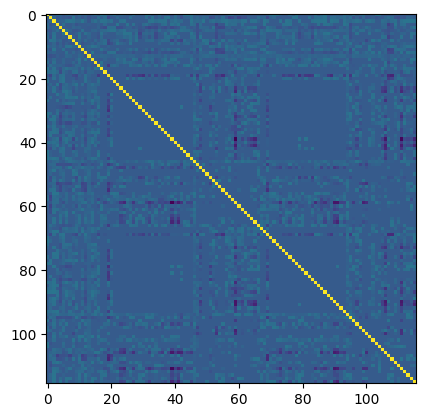

In [22]:
plt.imshow(pruned_matrix)

In [59]:
np.savetxt('prunned_matrix.txt'+real_name,pruned_matrix)